#G2M Insight for Cab Investment Firm


XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import holoviews as hv
import panel as pn
pn.extension(comms='colab')
import datetime as dt

In [ ]:
#importing the dataset from drive
gdown.download_folder('https://drive.google.com/drive/folders/1peKiUDP95iv7IjBn0T5jcRHDW7Ezu9OQ?usp=sharing', quiet=True)

['/content/G2M datasets/Cab_Data.csv',
 '/content/G2M datasets/City.csv',
 '/content/G2M datasets/Customer_ID.csv',
 '/content/G2M datasets/Transaction_ID.csv']

##Exploratory Data Analysis

In [ ]:
#load the datasets
cab_data = pd.read_csv('/content/G2M datasets/Cab_Data.csv')
customer_data = pd.read_csv( '/content/G2M datasets/Customer_ID.csv')
transaction_data = pd.read_csv('/content/G2M datasets/Transaction_ID.csv')
city_data = pd.read_csv('/content/G2M datasets/City.csv')

# Cab_data

In [ ]:
# View the first few rows of the data set
print('Cab_Data\n',cab_data.head())

Cab_Data
    Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08/01/2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06/01/2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02/01/2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07/01/2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03/01/2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [ ]:
cab_data.shape

(359392, 7)

In [ ]:
# Check data types and missing values of each data set
print('Cab_Data')
print('\n')
print(cab_data.info())



Cab_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None


In [ ]:
# Convert 'date of travel' column to datetime
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], dayfirst=True)
cab_data


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [ ]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661


In [ ]:
# Check if there is  null values in each data set
print('Cab_Data')
print('\n')
print(cab_data.isna().sum())

Cab_Data


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [ ]:
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Cab_data is ',cab_data.duplicated().sum())

Duplicate rows in the dataset Cab_data is  0


In [ ]:
cab_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

# Customer_data

In [ ]:
# View the first few rows of the data set

print('Customer_Data\n',customer_data.head())

Customer_Data
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [ ]:
customer_data.shape

(49171, 4)

In [ ]:
# Check data types and missing values of each data set
print('Customer_Data')
print('\n')
print(customer_data.info())

Customer_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
# Check if there is  null values in each data set
print('Customer_Data')
print('\n')
print(customer_data.isna().sum())

Customer_Data


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [ ]:
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Customer_data is ',customer_data.duplicated().sum())


Duplicate rows in the dataset Customer_data is  0


# Transaction_data

In [ ]:
# View the first few rows of the data set

print('Transaction_Data\n',transaction_data.head())

Transaction_Data
    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [ ]:
transaction_data.shape

(440098, 3)

In [ ]:
# Check data types and missing values of each data set

print('Transaction_Data')
print('\n')
print(transaction_data.info())

Transaction_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


In [ ]:
# Check if there is  null values in each data set
print('Transaction_Data')
print('\n')
print(transaction_data.isna().sum())


Transaction_Data


Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [ ]:
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset Transaction_data is ',transaction_data.duplicated().sum())

Duplicate rows in the dataset Transaction_data is  0


# City_data

In [ ]:
# View the first few rows of the data set

print('City_data\n',city_data.head())

City_data
              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [ ]:
city_data.shape

(20, 3)

In [ ]:
# Rename the column name Users and Population in City_data dataset
city_data = city_data.rename(columns={'Users': 'No: of Cab Users in the city'})
city_data = city_data.rename(columns={'Population': 'Population of the city'})

city_data.head()

,City,Population of the city,No: of Cab Users in the city
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Insights:
Users feature of city_data dataset is treated as number of cab users in the city. I have assumed that this can be other cab users as well (including Yellow and Pink cab)

In [ ]:
# Check data types and missing values of each data set

print('City_Data')
print('\n')
print(city_data.info())

City_Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   City                          20 non-null     object
 1   Population of the city        20 non-null     object
 2   No: of Cab Users in the city  20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


In [ ]:
# Check if there is  null values in each data set
print('City_Data')
print('\n')
print(city_data.isna().sum())

City_Data


City                            0
Population of the city          0
No: of Cab Users in the city    0
dtype: int64


In [ ]:
#check if there is duplicate rows on each dataset
print('Duplicate rows in the dataset City_data is ',city_data.duplicated().sum())

Duplicate rows in the dataset City_data is  0


###Insights:
From the above steps, we can understand that there are no null values and duplicate rows on each dataset

##Data Integration

###Findings:
* Here we merge the datasets 'cab_data' and 'transaction_data' with the
'Transaction ID' column and the customer_data dataset will be merged to it with the 'Customer ID' column. The city_data dataset will be merged to it with the 'City' column. We will form a new dataset 'final_cab_data' with these merged dataset.








In [ ]:
#Merge the datasets using Customer_ID and Transaction_ID

#merged_data = pd.merge(cab_data, transaction_data, on="Transaction ID")
#final_cab_data = pd.merge(merged_data, customer_data, on="Customer ID")

merged_data = cab_data.merge(transaction_data, on="Transaction ID")
merged_data = merged_data.merge(customer_data, on="Customer ID")
final_cab_data = merged_data.merge(city_data, on="City")


In [ ]:
print(final_cab_data)


        Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10351127     2018-07-21  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-23  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-06    Pink Cab     ATLANTA GA   
4             10320494     2018-04-21  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-03  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-13  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-06  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-02  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-08-30  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              26.19     

In [ ]:
# Check data types
print(final_cab_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Transaction ID                359392 non-null  int64         
 1   Date of Travel                359392 non-null  datetime64[ns]
 2   Company                       359392 non-null  object        
 3   City                          359392 non-null  object        
 4   KM Travelled                  359392 non-null  float64       
 5   Price Charged                 359392 non-null  float64       
 6   Cost of Trip                  359392 non-null  float64       
 7   Customer ID                   359392 non-null  int64         
 8   Payment_Mode                  359392 non-null  object        
 9   Gender                        359392 non-null  object        
 10  Age                           359392 non-null  int64         
 11  Income (USD/M

In [ ]:
# Handling Population of the city and No: of cab users in the city datatype to integer
def convert_int(x):
    if isinstance(x, str):
        return int(x.replace(',', ''))
    return x

In [ ]:
final_cab_data['Population of the city'] = final_cab_data['Population of the city'].apply(convert_int)
final_cab_data['No: of Cab Users in the city'] = final_cab_data['No: of Cab Users in the city'].apply(convert_int)
final_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population of the city,No: of Cab Users in the city
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [ ]:
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']
final_cab_data['Year'] = final_cab_data['Date of Travel'].dt.year
final_cab_data['Month'] = final_cab_data['Date of Travel'].dt.month
final_cab_data['Day'] = final_cab_data['Date of Travel'].dt.day

In [ ]:
final_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Transaction ID                359392 non-null  int64         
 1   Date of Travel                359392 non-null  datetime64[ns]
 2   Company                       359392 non-null  object        
 3   City                          359392 non-null  object        
 4   KM Travelled                  359392 non-null  float64       
 5   Price Charged                 359392 non-null  float64       
 6   Cost of Trip                  359392 non-null  float64       
 7   Customer ID                   359392 non-null  int64         
 8   Payment_Mode                  359392 non-null  object        
 9   Gender                        359392 non-null  object        
 10  Age                           359392 non-null  int64         
 11  Income (USD/M

In [ ]:
final_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population of the city,No: of Cab Users in the city,Profit,Year,Month,Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,3,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,4,13
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,7,6
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,2


In [ ]:
# checking summary statistics
print(final_cab_data.describe())

       Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293504      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.000000   
50%       386.3

In [ ]:
# Check for missing values
print(final_cab_data.isnull().sum())    #or this expression final_cab_data.isna().sum())
#Check for duplicates
print('Duplicate rows in the dataset Final_cab_data is ', final_cab_data.duplicated().sum())

Transaction ID                  0
Date of Travel                  0
Company                         0
City                            0
KM Travelled                    0
Price Charged                   0
Cost of Trip                    0
Customer ID                     0
Payment_Mode                    0
Gender                          0
Age                             0
Income (USD/Month)              0
Population of the city          0
No: of Cab Users in the city    0
Profit                          0
Year                            0
Month                           0
Day                             0
dtype: int64
Duplicate rows in the dataset Final_cab_data is  0


###Insights:
There are no duplicate rows and null values in the 'final_cab_data' dataset.


##Data Visualization

<Axes: >

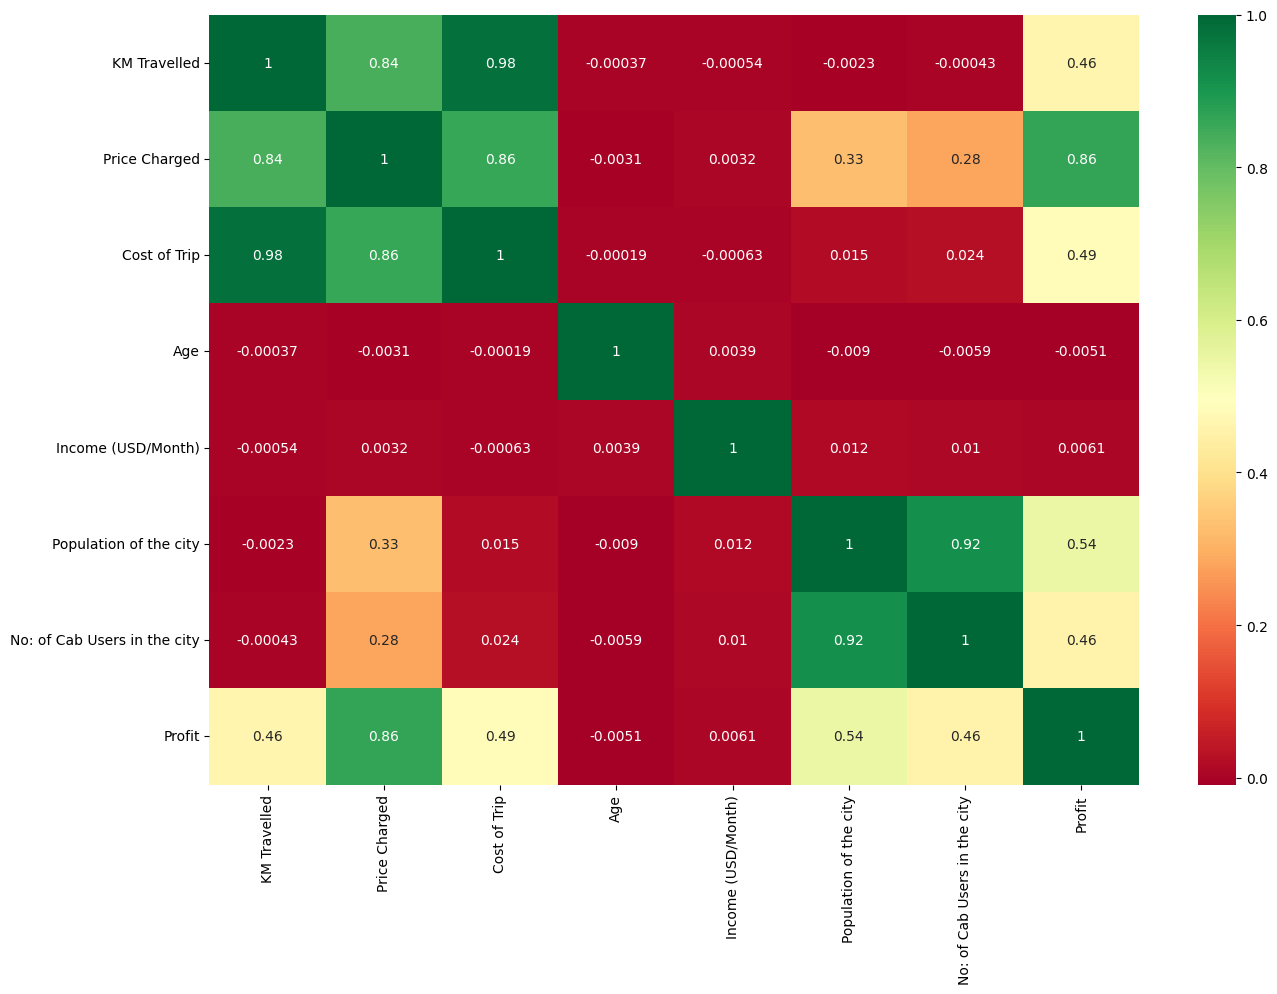

In [ ]:
#correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(final_cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population of the city', 'No: of Cab Users in the city', 'Profit']].corr(), annot=True, cmap="RdYlGn", ax=ax)

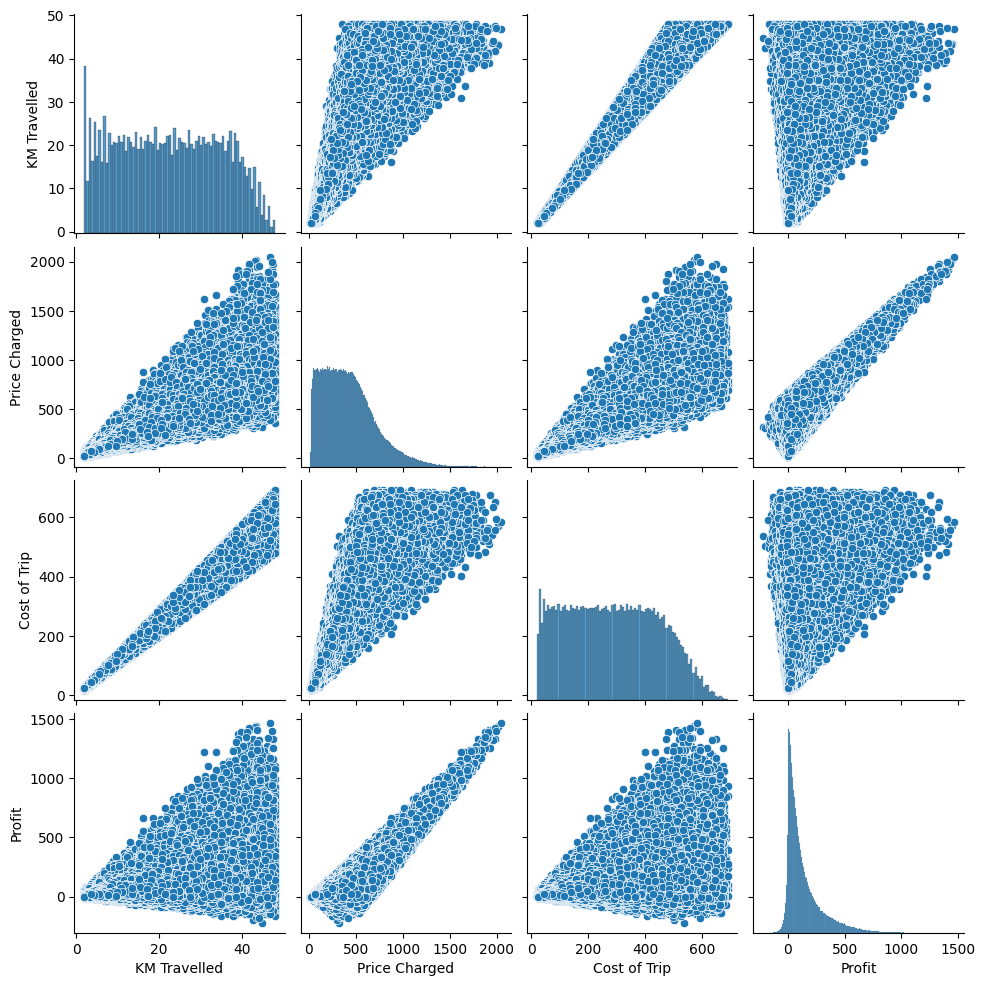

In [ ]:
# Plot pairplot
sns.pairplot(final_cab_data, vars=['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit'])
plt.show()

**Insights:**

From the pairplot and heat map, we can get to know that km travelled, price charged, cost of trip and profit has a direct relationship/ variation between each other

**Check the Total number of rides for each cab companies**

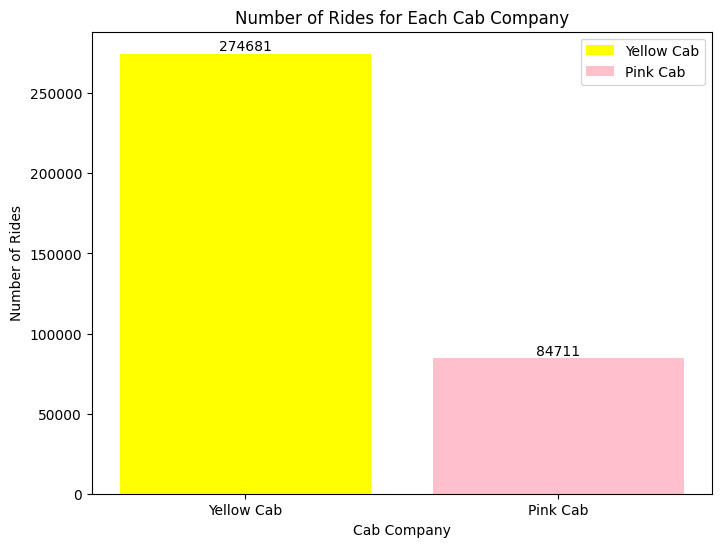

In [ ]:
# Plot a Histogram to Check the Total number of rides for each cab companies
# Group the data by 'Company' and count the number of rides
ride_counts = final_cab_data['Company'].value_counts()

# Define labels for the legend
legend_labels = ['Yellow Cab', 'Pink Cab']

# Create a histogram
plt.figure(figsize=(8, 6))
bars=plt.bar(ride_counts.index, ride_counts.values, color=['yellow', 'pink'])
plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Cab Company')

# Add labels (indicators) above the bars
for bar, count in zip(bars, ride_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Add legends
plt.legend(bars, legend_labels)
plt.show()

In [ ]:
# Plot an Interactive Histogram
# Check the Total number of rides for each cab companies


# Group the data by 'Company' and count the number of rides
ride_counts = final_cab_data['Company'].value_counts().reset_index()
ride_counts.columns = ['Company', 'Number of Rides']

# Create an interactive histogram using plotly with color mapping
color_mapping = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}
fig = px.bar(ride_counts, x='Company', y='Number of Rides', color='Company',
             color_discrete_map=color_mapping,
             title='Number of Rides for Each Cab Company')
fig.update_layout(xaxis_title='Cab Company', yaxis_title='Number of Rides')

# Show the interactive plot
fig.show()


###Insights:
From the above histogram, we can understand that 'Yellow Cab' has more number of rides compared to 'Pink Cab'.
That means most of the cab users prefer to choose services offered by 'Yellow Cab'.

**Check the total number of rides for each cabs year wise**

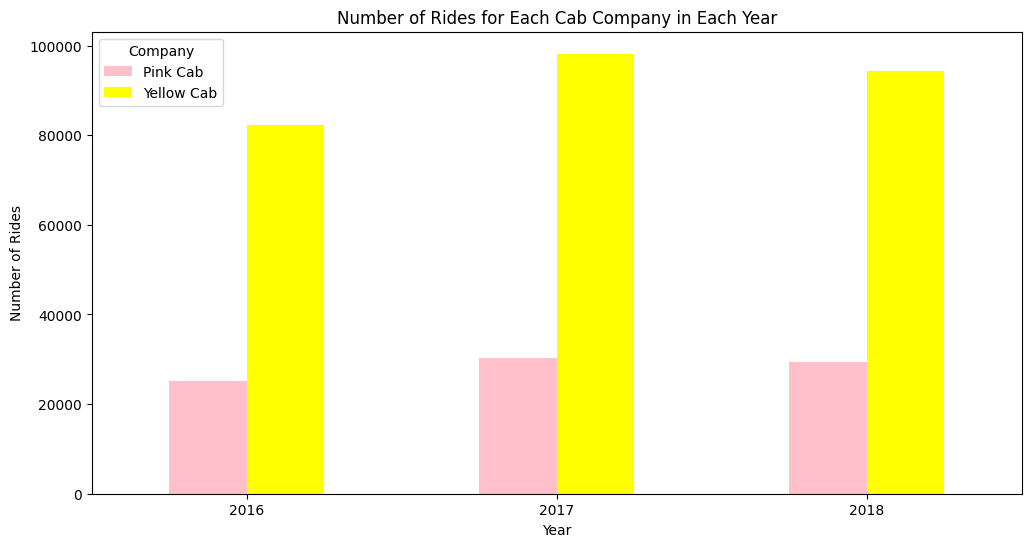

In [ ]:
# Extract the year from the 'Date of Travel' column with the correct date format
#final_cab_data['Date of Travel'] = pd.to_datetime(final_cab_data['Date of Travel'], format='%d/%m/%Y')

# Extract the year from the 'Date of Travel' column
final_cab_data['Year'] = pd.to_datetime(final_cab_data['Date of Travel']).dt.year

# Group the data by 'Year' and 'Company' and count the number of rides
ride_counts = final_cab_data.groupby(['Year', 'Company']).size().unstack(fill_value=0)

# Define colors for the cab companies
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart with specified colors
ax = ride_counts.plot(kind='bar', figsize=(12, 6,), color=[company_colors[company] for company in ride_counts.columns])

plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Cab Company in Each Year')
plt.xticks(rotation=0)
plt.legend(title='Company')

plt.show()


###Insights:
From the above histogram, we can understand that 'Yellow Cab' has more number of rides compared to 'Pink Cab' when we comapare it each year wise.
That means most of the cab users prefer to choose services offered by 'Yellow Cab' and 'Yellow cab' has maximum cab users

**Check the total number of rides for each cabs city wise**

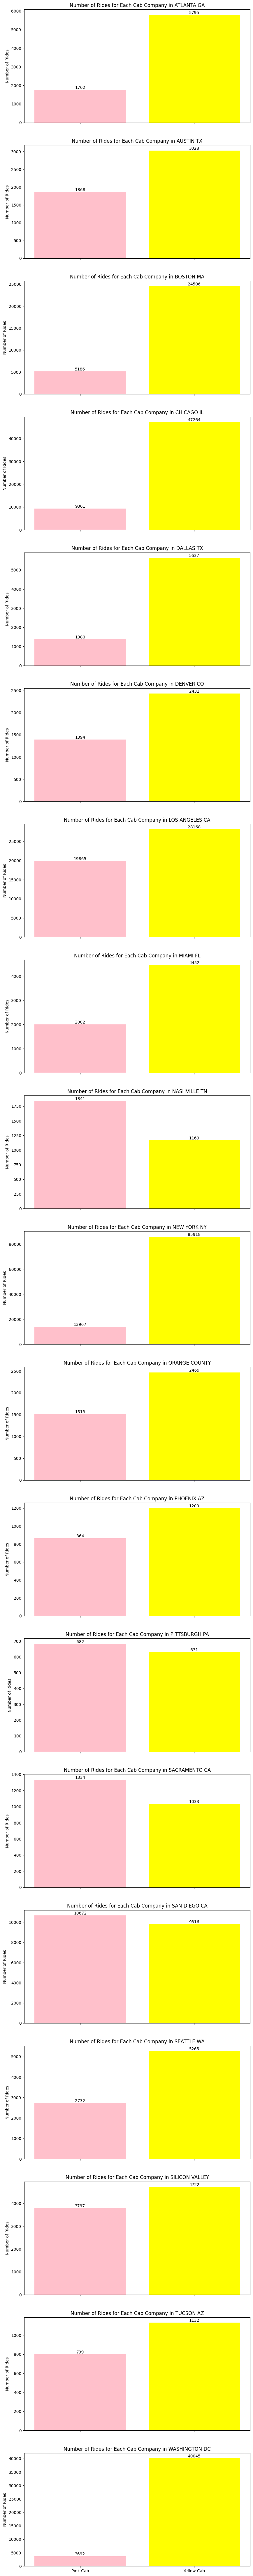

In [ ]:
# Checking the total number of rides for each cabs city wise
# Group the data by 'City' and 'Company' and count the number of rides
city_company_counts = final_cab_data.groupby(['City', 'Company']).size().unstack().fillna(0)

# Create a bar chart for each city
cities = city_company_counts.index
num_cities = len(cities)

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Set up the subplots
fig, axs = plt.subplots(num_cities, 1, figsize=(10, 6 * num_cities), sharex=True)

for i, city in enumerate(cities):
    city_data = city_company_counts.loc[city]

    # Create bars for Yellow Cab and Pink Cab
    x = range(len(city_data))
    axs[i].bar(x, city_data, color=[company_colors[company] for company in city_data.index])
    axs[i].set_ylabel('Number of Rides')
    axs[i].set_title(f'Number of Rides for Each Cab Company in {city}')

    # Add labels (indicators) above the bars
    for j, count in enumerate(city_data):
        axs[i].text(j, count, str(count), ha='center', va='bottom')

# Set x-axis tick labels as company names
plt.xticks(x, city_data.index)
plt.show()


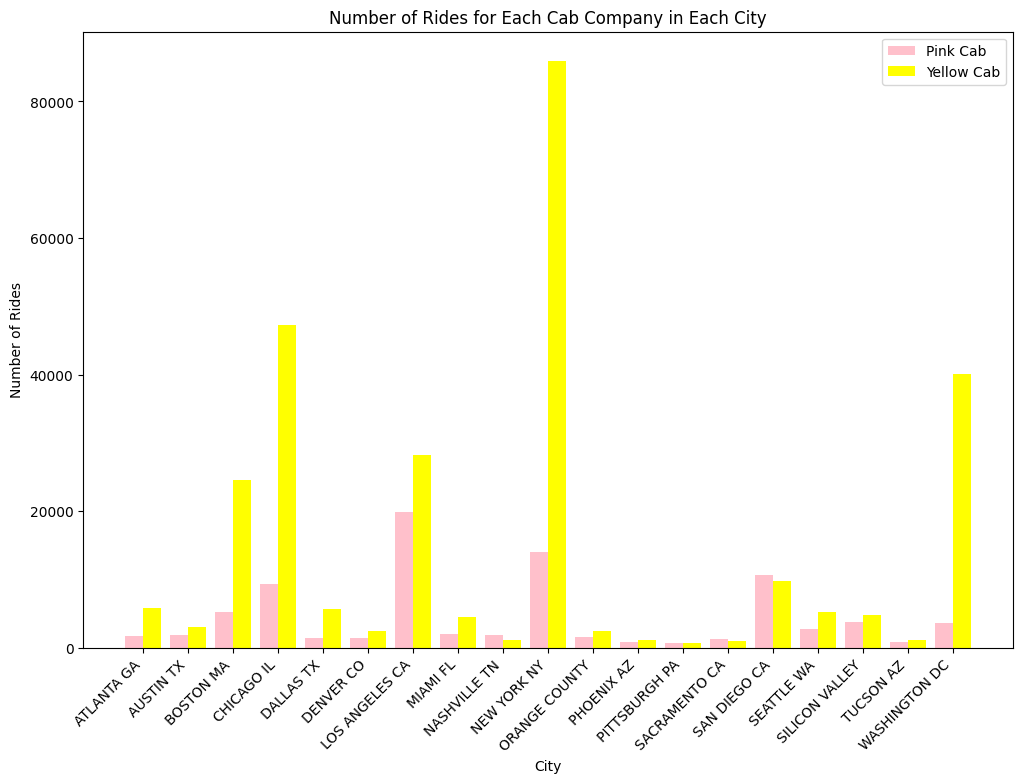

In [ ]:
#number of rides for each cab company city wise
# Group the data by 'City' and 'Company' and count the number of rides
rides_by_city_company = final_cab_data.groupby(['City', 'Company']).size().unstack(fill_value=0)

# Define cities and companies
cities = rides_by_city_company.index
companies = rides_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for the number of rides by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = rides_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()


plt.show()


**Insights:**


*   Yellow Cab Has highest number of rides in the cities NewYork NY, Chicago IL, Washington DC respectively




**Outliers:**

Pink cab has got more number of rides when compared to yellow cabs in cities like
*  Nashville TN(Pink cab:1841, Yellow cab:1169)
*  Pittsburgh PA(Pink cab:682, Yellow cab: 631)
*  Sacramento CA(Pink cab:1134, Yellow cab:1033)
*  San Deigo CA(Pink cab:10672, Yellow cab:9816)

These exceptions we can ignore when compared to the yellow cab rides in other major cities.But we need to focus on these cities to increase the rides and customers for yellow cab. We need to give promotional offers to yellow cab users in these cities



**Which company has maximum cab users at a particular time period?**

**Check the total number of customers for each Cab**

<ipython-input-47-14b6f6462149>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




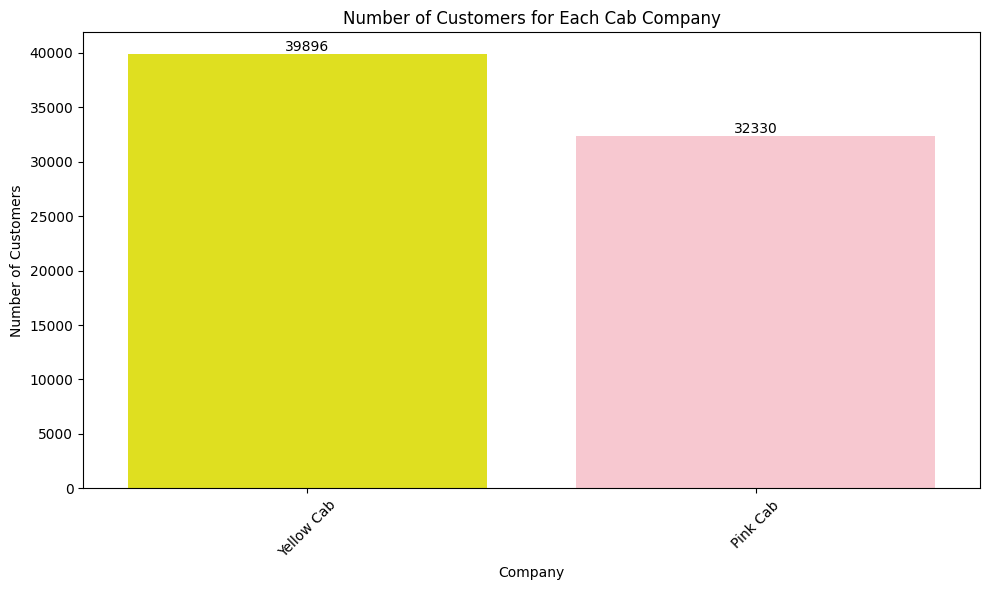

In [ ]:
# Group by 'Company' and count unique 'Customer ID'
customer_counts = final_cab_data.groupby('Company')['Customer ID'].nunique().sort_values(ascending=False)

# Define colors for the cab companies
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Plotting using seaborn for a nicer visualization
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=company_colors)

# Adding values on top of each bar
for i, v in enumerate(customer_counts.values):
    plot.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for Each Cab Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights:**

*   Yellow Cab has the highest number of customers than pink cab and still there is high competition among both cab companies.
*   Yellow cab can increase more customers by bringing promotional offers and discounts to new customers.









**Yearly Trend Line of the Cab Customers**

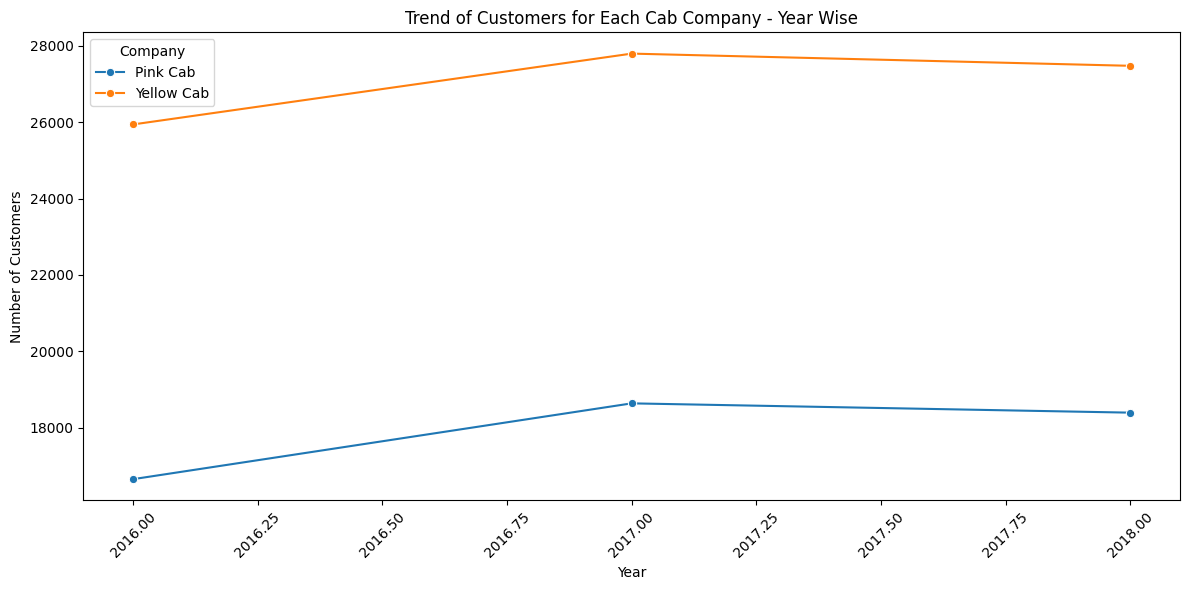

In [ ]:
# Group by 'Company' and 'Year', then count unique 'Customer ID'
customer_counts_yearwise = final_cab_data.groupby(['Company', 'Year'])['Customer ID'].nunique().reset_index()

# Plotting using seaborn for a trend line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Customer ID', hue='Company', data=customer_counts_yearwise, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Trend of Customers for Each Cab Company - Year Wise')
plt.xticks(rotation=45)
plt.legend(title='Company', loc='upper left')

plt.tight_layout()
plt.show()

**Insights:**


*   Yellow cab has more customers than pink cab
*   Both the cab companies have the more number of customers in the year 2017 and after that there is a slight decrease in them. This can be due to the increase in price charged for the cost of trip. This should be considered immediately otherwise there is chances of loosing more customers.



**Check the total number of customers for each Cab city wise**

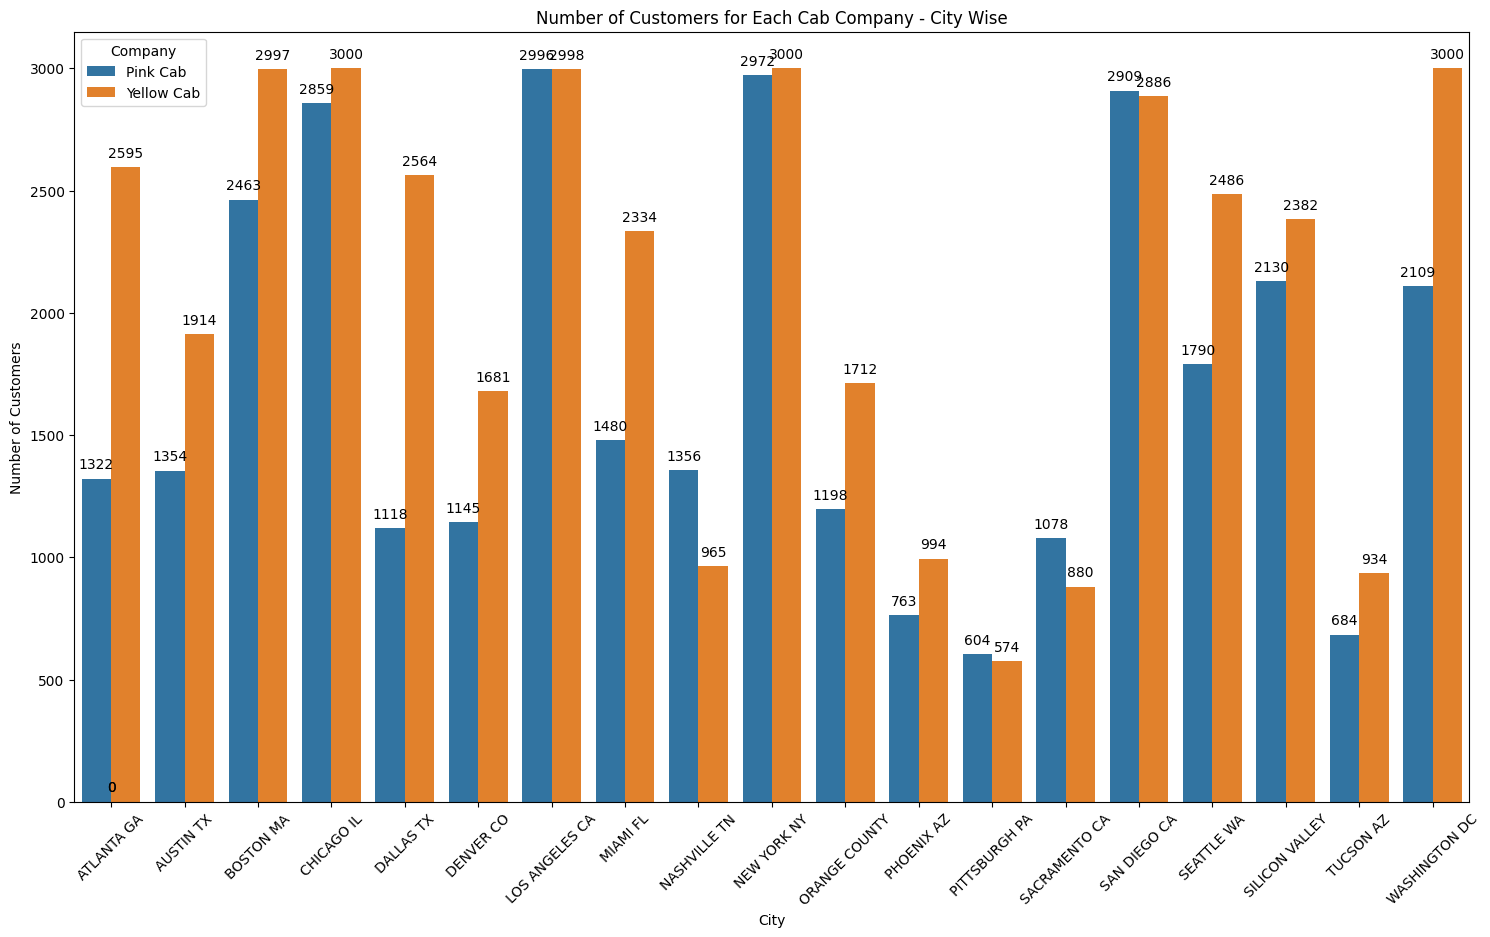

In [ ]:
# Group by 'Company' and 'City', then count unique 'Customer ID'
customer_counts_citywise = final_cab_data.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()

# Plotting using seaborn for a nicer visualization
plt.figure(figsize=(18, 10))
plot = sns.barplot(x='City', y='Customer ID', hue='Company', data=customer_counts_citywise)

# Adding values on top of each bar
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for Each Cab Company - City Wise')
plt.xticks(rotation=45)
plt.legend(title='Company', loc='upper left')

plt.show()

**Insights:**

In the cities like Los Angeles CO, New York NY, Pitturburgh PA, SAN DIEGO CA,  there is a high competition among Yellow Cab and Pink Cab. We need to offer dicounts and promotional offers to customers, so that we can increase the rides of Yellow cabs.

Yellow Cab users are high in most of the cities.

**Check the Total Revenue generated by each cabs**




In [ ]:
#Check the total revenue generated by each cabs

# Calculate the total revenue for Yellow Cab
yellow_cab_revenue = final_cab_data[final_cab_data['Company'] == 'Yellow Cab']['Price Charged'].sum()

# Calculate the total revenue for Pink Cab
pink_cab_revenue = final_cab_data[final_cab_data['Company'] == 'Pink Cab']['Price Charged'].sum()

# Compare the total revenues
print(f"Total Revenue for Yellow Cab: ${yellow_cab_revenue:.2f}")
print(f"Total Revenue for Pink Cab: ${pink_cab_revenue:.2f}")

# Make a comparison
if yellow_cab_revenue > pink_cab_revenue:
    print("Yellow Cab has higher revenue.")
elif yellow_cab_revenue < pink_cab_revenue:
    print("Pink Cab has higher revenue.")
else:
    print("Both Yellow Cab and Pink Cab have the same revenue.")


Total Revenue for Yellow Cab: $125853887.19
Total Revenue for Pink Cab: $26328251.33
Yellow Cab has higher revenue.


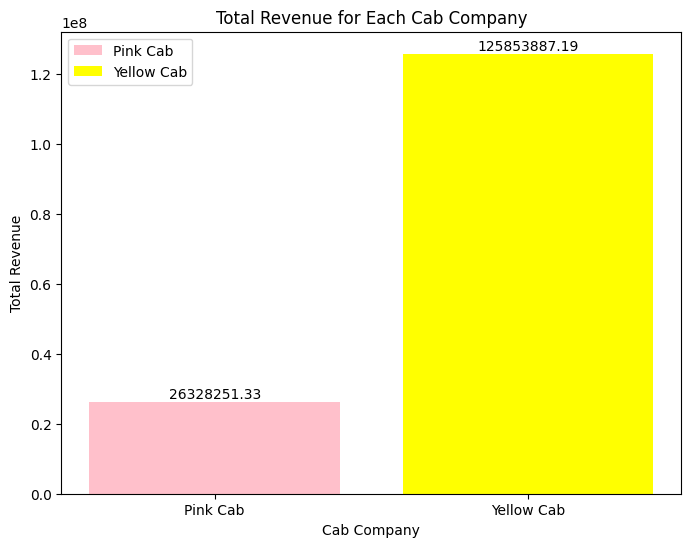

In [ ]:
# Calculate the total revenue generated by each cabs
final_cab_data['Revenue'] = final_cab_data['Price Charged']

# Group the data by 'Company' and sum the profit
revenue_by_company = final_cab_data.groupby('Company')['Revenue'].sum()

# Define labels for the legend
legend_labels = ['Pink Cab', 'Yellow Cab']

# Create a bar chart to visualize profit for each cab company
plt.figure(figsize=(8, 6))
bars = plt.bar(revenue_by_company.index, revenue_by_company.values, color=['pink','yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for Each Cab Company')
plt.legend(bars, legend_labels)


# Add labels (indicators) above the bars
for bar, count in zip(bars, revenue_by_company):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')



**Check the Total Revenue generated by each cabs year wise**

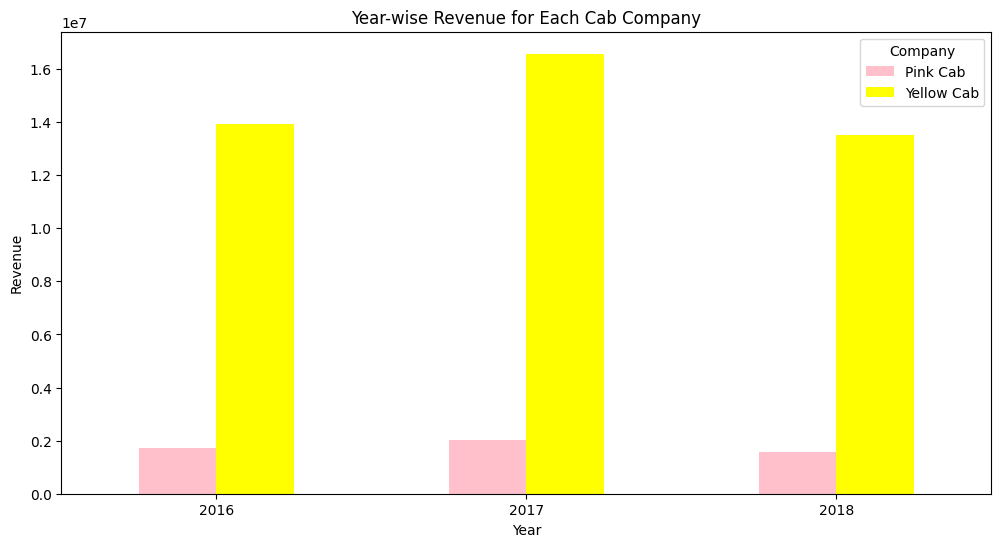

In [ ]:
#Check the Total Revenue generated by each cabs year wise
final_cab_data['Year'] = final_cab_data['Date of Travel'].dt.year

# Calculate revenue for each ride
final_cab_data['Revenue'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'Year' and 'Company' and sum the revenue
revenue_by_year_company = final_cab_data.groupby(['Year', 'Company'])['Revenue'].sum().unstack(fill_value=0)

# Define colors for the cab companies
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart with specified colors
ax = revenue_by_year_company.plot(kind='bar', figsize=(12, 6), color=[company_colors[company] for company in revenue_by_year_company.columns])

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Year-wise Revenue for Each Cab Company')
plt.xticks(rotation=0)
plt.legend(title='Company')

plt.show()

**Insights:**

* Yellow Cab has earned more revenue when compared to Pink Cab in each Year.
* Yellow Cab has earned more revenue in the year 2017.

**Check the Total Revenue generated by each cabs city wise**




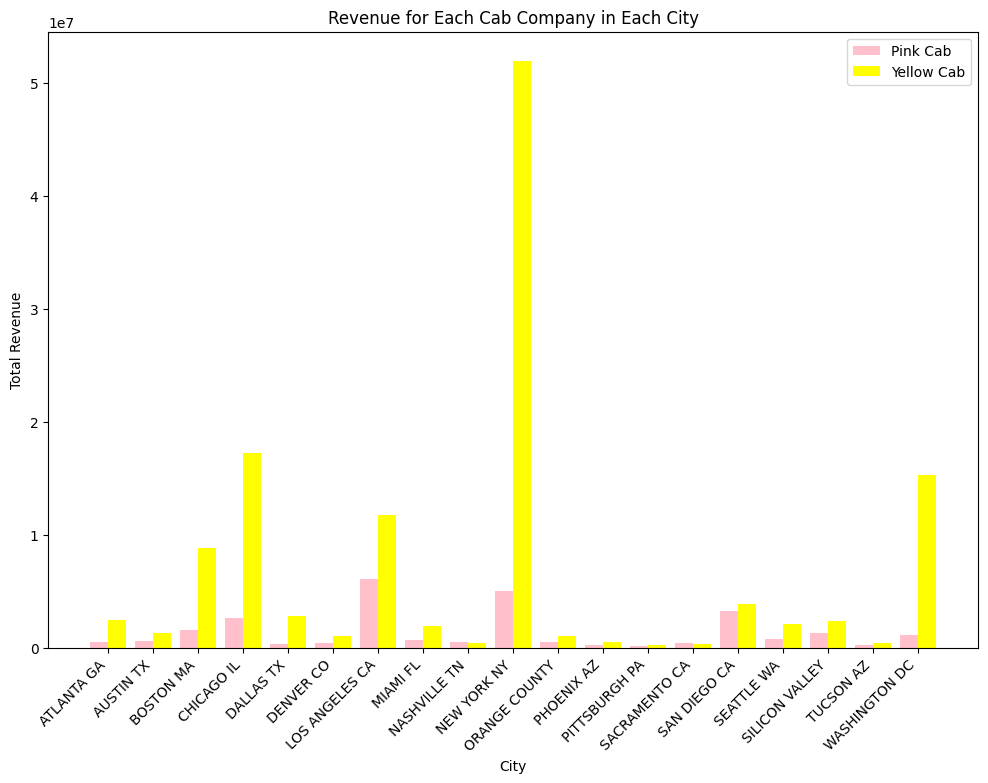

In [ ]:
#Total revenue for each cab city wise

# Group the data by 'City' and 'Company' and sum the revenue
revenue_by_city_company = final_cab_data.groupby(['City', 'Company'])['Price Charged'].sum().unstack(fill_value=0)

# Define cities and companies
cities = revenue_by_city_company.index
companies = revenue_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for revenue by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = revenue_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Revenue for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()

plt.show()


**Check the Profit Earned by each cabs**




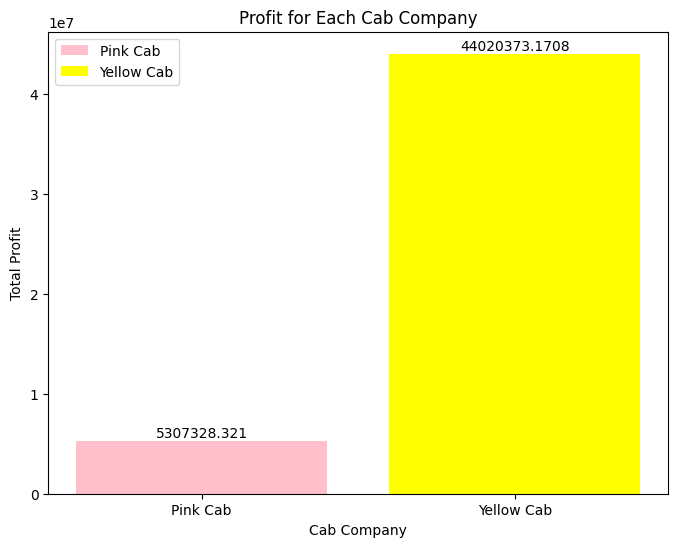

In [ ]:
# Calculate profit earned by each cab companies
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'Company' and sum the profit
profit_by_company = final_cab_data.groupby('Company')['Profit'].sum()

# Define labels for the legend
legend_labels = ['Pink Cab','Yellow Cab']

# Create a bar chart to visualize profit for each cab company
plt.figure(figsize=(8, 6))
bars = plt.bar(profit_by_company.index, profit_by_company.values, color=[ 'pink','yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Profit')
plt.title('Profit for Each Cab Company')
plt.legend(bars, legend_labels)


# Add labels (indicators) above the bars
for bar, count in zip(bars, profit_by_company):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')



**Check the Profit Earned by each cabs Year wise**

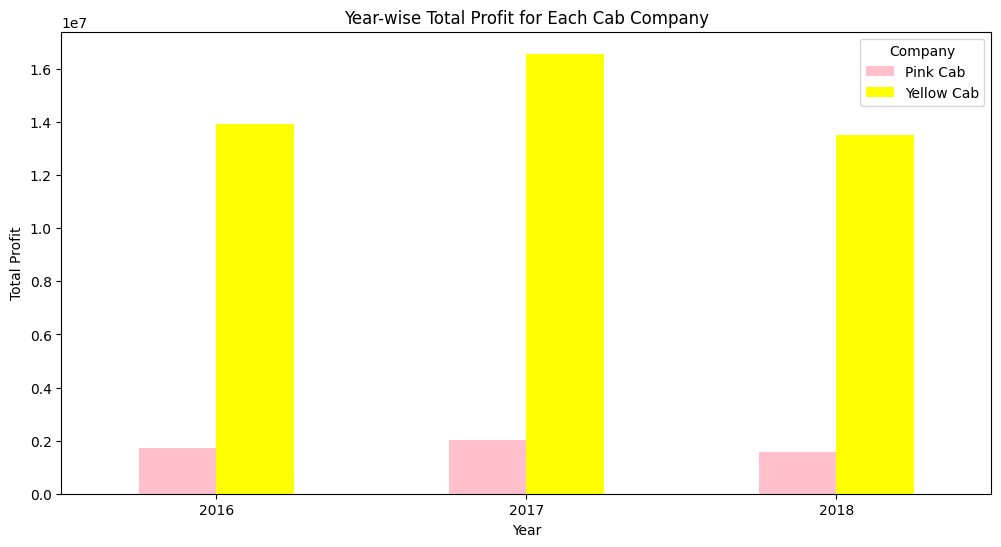

In [ ]:
# Extract the year from the 'Date of Travel' column with the correct date format
final_cab_data['Year'] = final_cab_data['Date of Travel'].dt.year

# Calculate profit for each ride
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'Year' and 'Company' and sum the profit
profit_by_year_company = final_cab_data.groupby(['Year', 'Company'])['Profit'].sum().unstack(fill_value=0)

# Define colors for the cab companies
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart with specified colors
ax = profit_by_year_company.plot(kind='bar', figsize=(12, 6), color=[company_colors[company] for company in profit_by_year_company.columns])

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Year-wise Total Profit for Each Cab Company')
plt.xticks(rotation=0)
plt.legend(title='Company')

plt.show()


**Insights:**

* Yellow Cab has earned more profit when compared to Pink Cab in each Year.
* Yellow Cab has earned more Profit in the year 2017.

**Check the Profit Earned by each cabs City wise**




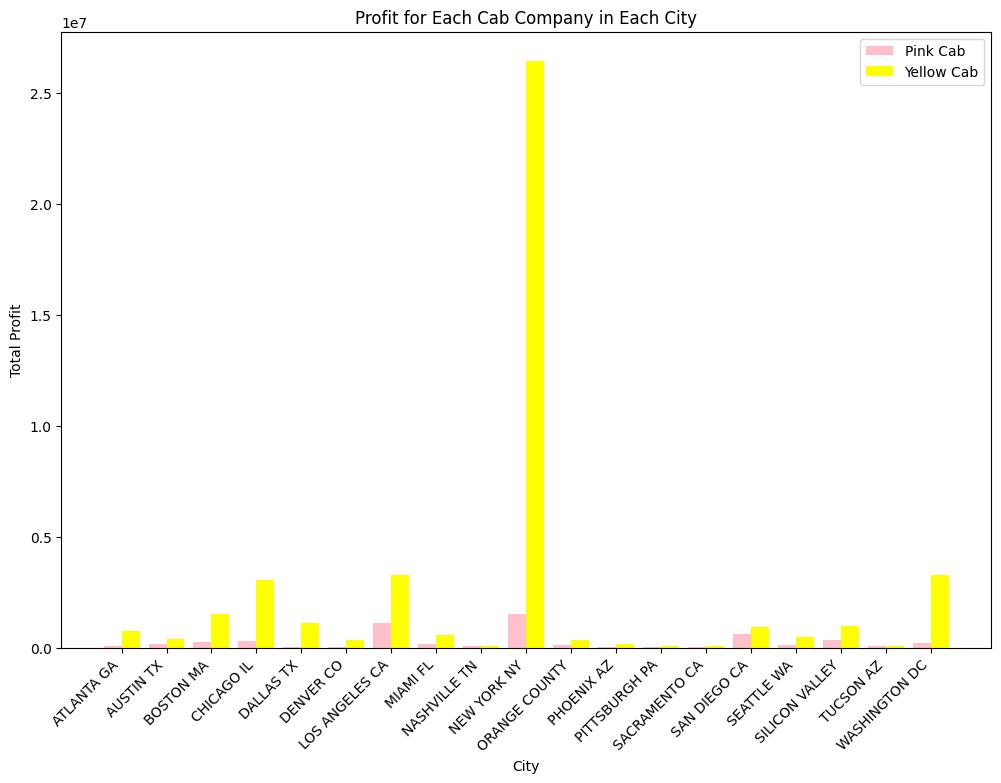

In [ ]:
# Calculate profit for each ride
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Group the data by 'City' and 'Company' and sum the profit
profit_by_city_company = final_cab_data.groupby(['City', 'Company'])['Profit'].sum().unstack(fill_value=0)

# Define cities and companies
cities = profit_by_city_company.index
companies = profit_by_city_company.columns

# Define colors for each company
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart for profit by city and company
num_cities = len(cities)
x = np.arange(num_cities)
bar_width = 0.4

plt.figure(figsize=(12, 8))

for i, company in enumerate(companies):
    company_data = profit_by_city_company[company]
    plt.bar(x + i * bar_width, company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit for Each Cab Company in Each City')
plt.xticks(x + bar_width * (len(companies) - 1) / 2, cities, rotation=45, ha='right')
plt.legend()

plt.show()


Insights:

Yellow cab has earned more profit in the city New York NY. Yellow cab has got highest number of rides and Kms travelled in this city.

**Trend Line on Monthly profit for each Cab Company**

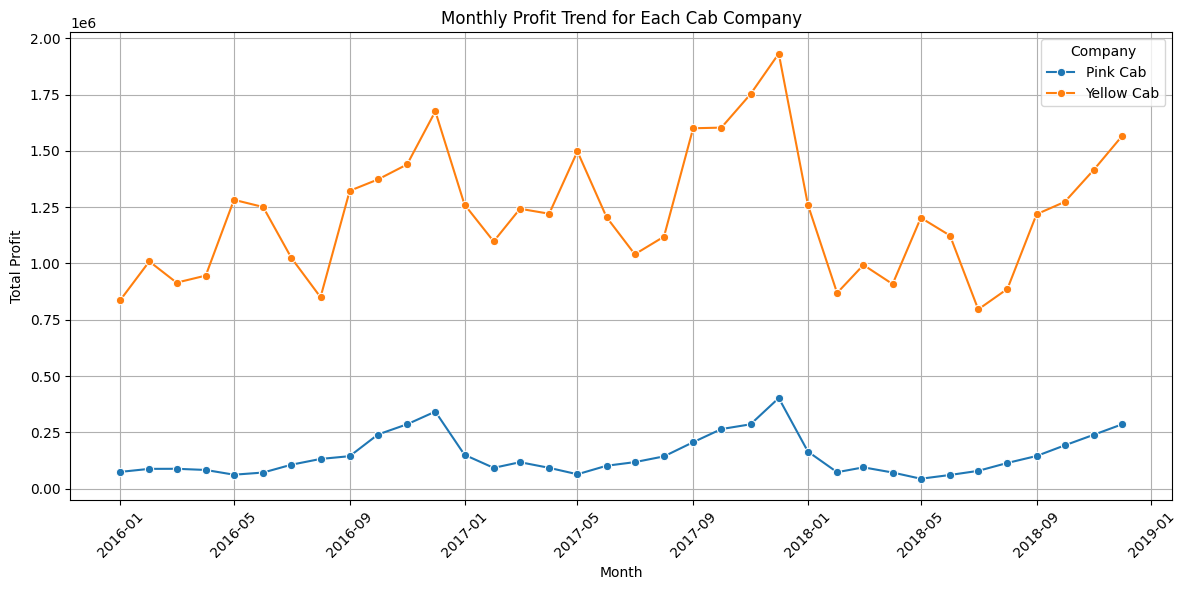

In [ ]:
# Aggregate monthly profit for each company
monthly_profit = final_cab_data.groupby(['Year', 'Month', 'Company'])['Profit'].sum().reset_index()

# Create a 'YearMonth' column for easier plotting
monthly_profit['YearMonth'] = pd.to_datetime(monthly_profit[['Year', 'Month']].assign(DAY=1))

# Plot the trend lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit, x='YearMonth', y='Profit', hue='Company', marker='o')
plt.title('Monthly Profit Trend for Each Cab Company')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**

*   Yellow cab has earned more profit than Pink Cab.
*   The profit level of Yellow cab has reached the maximum by the end of the year 2017 and it got suddenly reduced in the beginning of 2018.



**Check the Kilometres travelled by each cabs**




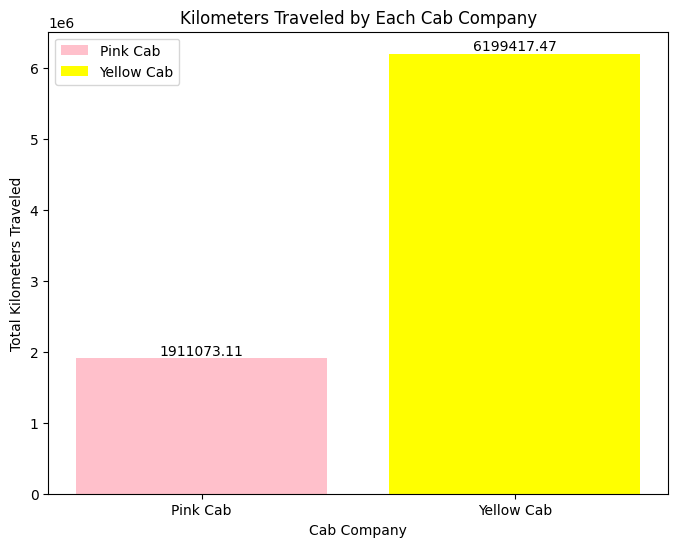

In [ ]:
#kms travelled by each cab
import matplotlib.pyplot as plt

# Group the data by 'Company' and calculate the total kilometers traveled
kilometers_traveled = final_cab_data.groupby('Company')['KM Travelled'].sum()


# Create a bar chart to visualize kilometers traveled by each cab
plt.figure(figsize=(8, 6))
bars = plt.bar(kilometers_traveled.index, kilometers_traveled.values, color=['pink', 'yellow'])
plt.xlabel('Cab Company')
plt.ylabel('Total Kilometers Traveled')
plt.title('Kilometers Traveled by Each Cab Company')
plt.legend(bars, legend_labels)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()





**Check the Kilometres travelled by each cabs**

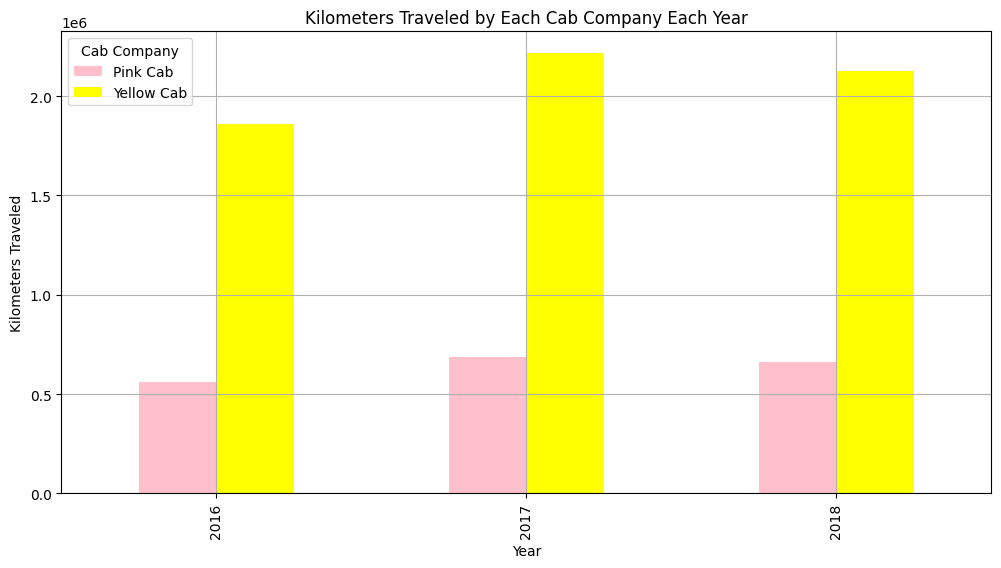

In [ ]:
# Extract the year from the 'Date of Travel' column
final_cab_data['Year'] = final_cab_data['Date of Travel'].dt.year

# Group the data by 'Year' and 'Company' and calculate the total kilometers traveled
kilometers_traveled_yearly = final_cab_data.groupby(['Year', 'Company'])['KM Travelled'].sum().unstack()

# Define colors for the cab companies
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart with custom colors
plt.figure(figsize=(12, 6))
kilometers_traveled_yearly.plot(kind='bar', ax=plt.gca(), color=[colors[col] for col in kilometers_traveled_yearly.columns])
plt.xlabel('Year')
plt.ylabel('Kilometers Traveled')
plt.title('Kilometers Traveled by Each Cab Company Each Year')
plt.legend(title='Cab Company')
plt.grid(True)
plt.show()


**Check the Kilometres travelled by each cabs city wise**




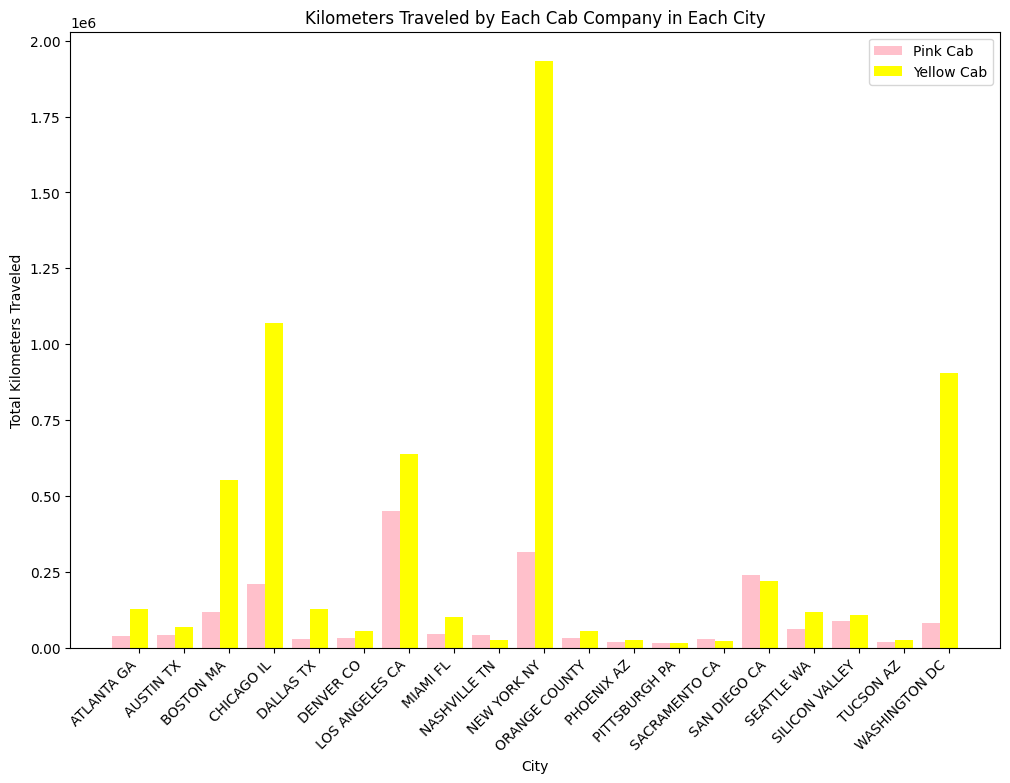

In [ ]:
#Kms travelled by each cab in each city

# Group the data by 'City' and 'Company' and calculate the total kilometers traveled
kilometers_traveled_citywise = final_cab_data.groupby(['City', 'Company'])['KM Travelled'].sum().unstack(fill_value=0)

# Define the colors for 'Yellow Cab' and 'Pink Cab'
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a grouped bar chart to visualize kilometers traveled by each cab company city-wise
plt.figure(figsize=(12, 8))

# Get the cities and companies
cities = kilometers_traveled_citywise.index
companies = kilometers_traveled_citywise.columns

x = range(len(cities))
bar_width = 0.4

for i, company in enumerate(companies):
    company_data = kilometers_traveled_citywise[company]
    plt.bar([pos + i * bar_width for pos in x], company_data, bar_width, label=company, color=company_colors[company])

plt.xlabel('City')
plt.ylabel('Total Kilometers Traveled')
plt.title('Kilometers Traveled by Each Cab Company in Each City')
plt.xticks([pos + bar_width for pos in x], cities, rotation=45, ha='right')
plt.legend()

plt.show()


**Check the Average Profit per Kilometre of each cab**




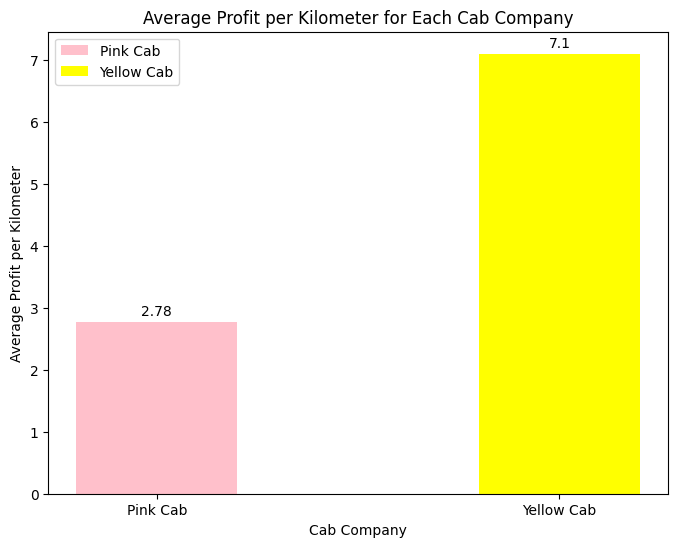

In [ ]:
#Avg Profit per KM

# Calculate profit for each ride
final_cab_data['Profit'] = final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']

# Calculate the average profit per kilometer for each cab company
avg_profit_per_km = final_cab_data.groupby('Company')['Profit'].mean() / final_cab_data.groupby('Company')['KM Travelled'].mean()

# Define the colors for 'Yellow Cab' and 'Pink Cab'
company_colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Create a bar chart to visualize the average profit per kilometer for each cab company
plt.figure(figsize=(8, 6))

# Get the companies and values
companies = avg_profit_per_km.index
values = avg_profit_per_km.values

x = range(len(companies))
bar_width = 0.4

for i, company in enumerate(companies):
    plt.bar(x[i], values[i], bar_width, label=company, color=company_colors[company])
    plt.text(x[i], values[i] + 0.05, round(values[i], 2), ha='center', va='bottom')

plt.xlabel('Cab Company')
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer for Each Cab Company')
plt.xticks(x, companies)
plt.legend()

plt.show()


**To check the customer retention in choosing the same cab for atleast 5 rides**

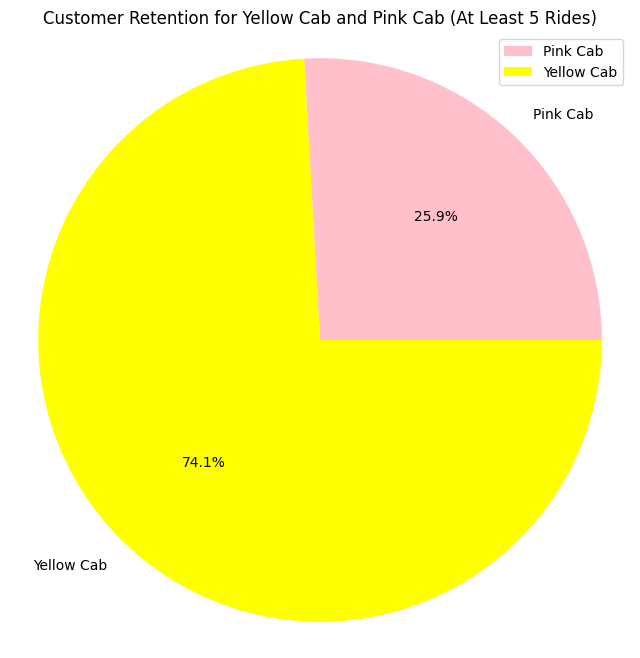

In [ ]:
#To check the customer retention for the same cab for atleast 5 rides

# Assuming you have a dataset named 'final_cab_data' with columns 'Customer ID' and 'Company'

# Count the number of rides taken by each customer with each cab company
customer_ride_counts = final_cab_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Rides')

# Filter for customers who have taken the same cab at least 5 times
loyal_customers = customer_ride_counts[customer_ride_counts['Rides'] >= 5]

# Count the number of loyal customers for each cab company
loyal_customer_counts = loyal_customers.groupby('Company')['Customer ID'].nunique()

# Create a pie chart to visualize customer retention
plt.figure(figsize=(8, 8))
plt.pie(loyal_customer_counts, labels=loyal_customer_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Customer Retention for Yellow Cab and Pink Cab (At Least 5 Rides)')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()




**To check the customer retention in choosing the same cab for atleast 5 rides**

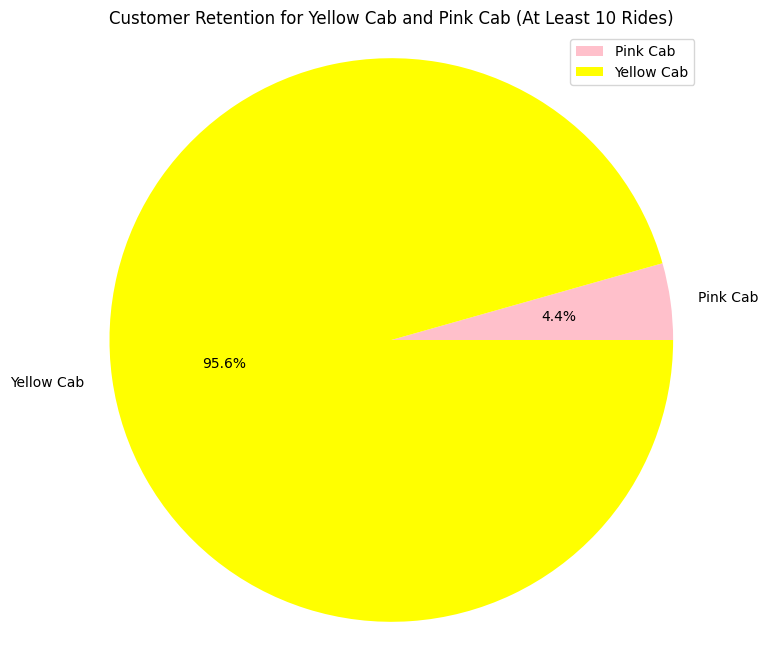

In [ ]:
#To check the customer retention for the same cab for atleast 10 rides

# Assuming you have a dataset named 'final_cab_data' with columns 'Customer ID' and 'Company'

# Count the number of rides taken by each customer with each cab company
customer_ride_counts = final_cab_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Rides')

# Filter for customers who have taken the same cab at least 5 times
loyal_customers = customer_ride_counts[customer_ride_counts['Rides'] >= 10]

# Count the number of loyal customers for each cab company
loyal_customer_counts = loyal_customers.groupby('Company')['Customer ID'].nunique()

# Create a pie chart to visualize customer retention
plt.figure(figsize=(8, 8))
plt.pie(loyal_customer_counts, labels=loyal_customer_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])
plt.title('Customer Retention for Yellow Cab and Pink Cab (At Least 10 Rides)')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()




**Insights:**


*   'Yellow Cab' has more number of rides compared to 'Pink Cab'.
That means most of the cab users prefer to choose services offered by 'Yellow Cab' and it has maximum cab users.

* Total Revenue generated by 'Yellow Cabs' are more when compared to the 'Pink cab'.

* Total Profit earned by 'Yellow Cabs' are more when compared to the 'Pink cab'.
* Kms Travelled by 'Yellow Cabs' are more when compared to the 'Pink cab'.
* Profit per Km of 'Yellow Cabs' are more when compared to the 'Pink cab'.
* Customers prefer to choose 'Yellow Cabs' during their next journey once they have undergone a ride with it. Customer Retention is more.

**Recommendation**

I recommend that XYZ company should invest in **'Yellow cab'**  company to gain more profit

**Outliers:**

*Pink cab has got more number of rides when compared to yellow cabs in cities like
- Nashville TN(Pink cab:1841, Yellow cab:1169)
-  Pittsburgh PA(Pink cab:682, Yellow cab: 631)
*  Sacramento CA(Pink cab:1134, Yellow cab:1033)
*  San Deigo CA(Pink cab:10672, Yellow cab:9816)

These exceptions we can ignore when compared to the yellow cab rides in other major cities.   

*Total Revenue generated by Pink cab is more when compared to yellow cab in cities like
-  Nashville TN
-  Pittsburgh PA
*  Sacramento CA

These exceptions we can ignore when compared to the total revenue generated by yellow cab in other major cities.  

*Total Profit earned  by Pink cab is more when compared to yellow cab in cities like
-  Nashville TN
* Tucson AZ

These exceptions we can ignore when compared to the total profit earned by yellow cab in other major cities.  

In the cities with the exceptions, we need to focus on services offered to customers to get more rides for the Yellow cabs. We need to bring promotional offers to yellow cab users.